# 9 - Plot Figure 15
# All Optimisations: Memory Capacity with Noise

This notebook plots figure 15 from *Section 9.4: Combining the Optimisation Approaches*.

The notebook uses previously generated data stored in the `examples\experiment_results\experiment_B_all_opts` folder.  If you would like to generate fresh data to be plotted, use the notebook `8 - Experiment_B_all_opts - Run.ipynb`.

To examine the effect of the sub-pattern recognition optimisations on ESAM network noise robustness, the following experiment was used:

<table>
<tr><td>

| Problem B (varying memories)   |          |
| :----------- | :------  | 
| $f$          | 2,000      | 
| $m$          | 1,000 - 2 million | 
| $s_m$        | 0.1     | 
| $s_n$        | Varying      | 
</td><td>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
</td><td>

| Fully Optimised Network |          |
| :--------------------| :------  | 
| $h$                  | 2        | 
| $\theta$             | Optimised      | 
| $s^+_{f\_h}$         | 0.1      | 
| $\sigma_{h\_pre+}$   | `FixedNumber` | 
| $s^+_{h\_f}$         | 1 or 0.5    | 
| $s^-_{h\_f}$         | 1 or 0.5 or 0   | 
| $\sigma_{f\_pre+}$, $\sigma_{f\_pre-}$  |  `FixedNumber`       | 
| $e$                  | 3        | 

</td></tr> </table>

The accuracy of three different networks are studied in a noise environment as the number of memories $m$ varies:

* Fully Optimised Network - Full modulation $s^+_{h\_f} = 1$ and $s^-_{h\_f} = 1$
* Fully Optimised Network - Partial modulation $s^+_{h\_f} = 0.5$ and $s^-_{h\_f} = 0.5$
* Fully Optimised Network - Full excitatory modulation $s^+_{h\_f} = 1$ and no inhibitory modulation

Results from the initial paper [1] are also plotted in Figure 11. This is to validate that they are the same as the baseline from Network B.


[1] Hoffmann, H. (2019). Sparse Associative Memory. *Neural Computation*

## Dependencies

In [1]:
import sys
sys.path.append('../src')
import os


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from simulation_scripts.test_suite_reader import TestSuiteReader, get_topology_data_for_test
from simulation_scripts.utils.excel_handler import ExcelHandler, get_timestamp_str

plt.tight_layout()
sns.set_theme(style="whitegrid")

<Figure size 640x480 with 0 Axes>

## Set up the test suite details

Specify where the plot data will be aquired from.

In [2]:
# The directory containing the test data
data_base_dir = 'experiment_results'
test_group_name = 'experiment_B_all_opts'
base_dir = data_base_dir+os.sep+test_group_name

# The tests dictionary is a mapping between the excel files that contain the data and 
# the names that will appear in the plots.
tests = {'fully_optimised_full_mod': 'Optimized Network B - full modulation',
         'fully_optimised_partial_mod' : 'Optimized Network B - 0.5 modulation',
         'fully_optimised_no_inhib' : 'Optimized Network B - no inhibitory modulation'}

test_files = list(tests.keys())

# The name of the data sheet in each of the excel files that contains the relevant data.
data_sheet = 'paper_data'
# If the test suites are re-run, the latest data will always be stored in 'latest_data'. Uncomment the following
# line to pick up this data.
#data_sheet = 'latest_data'

# test_suite_type defines whether aspects of the problem space or the network are varied 
# for each test. This is necessary for generating the theoretical data. 
test_suite_type='vary_problem'

x_col = 'data_param_m'

## Read in the data

Read in the empirical test data generated by `8 - Experiment_B_all_opts - Run.ipynb`

In [3]:
test_reader = TestSuiteReader(test_dir=base_dir,
                              test_suite_type=test_suite_type,
                              tests = tests,
                              test_data_sheet=data_sheet)
all_tests = test_reader.get_tests_data()

hue_order = []
for _, test_name in tests.items():
    hue_order.append(test_name)

for test, test_name in tests.items():
    reader = ExcelHandler(base_dir, test)
    test_df = reader.read_sheet(data_sheet)
    test_name_np = np.repeat([test_name], repeats=test_df.shape[0], axis=0)
    test_df['test'] = test_name_np
    all_tests = pd.concat([all_tests, test_df])

reader = ExcelHandler(base_dir, 'fully_optimised_full_mod')
network_static = reader.read_sheet(sheet_name='network_params_static').iloc[0]

# Filter on the final epoch
plot_data = all_tests.copy().loc[all_tests['epoch'] == network_static['e']]

tests are :  ['fully_optimised_full_mod', 'fully_optimised_partial_mod', 'fully_optimised_no_inhib']
test dir:  experiment_results/experiment_B_all_opts
Using the following pre-generated data:

  File                                                            Data Sheet
  ---------------------------------------------------------------------------
  experiment_results/experiment_B_all_opts/fully_optimised_full_mod.xlsx    paper_data
  experiment_results/experiment_B_all_opts/fully_optimised_partial_mod.xlsx    paper_data
  experiment_results/experiment_B_all_opts/fully_optimised_no_inhib.xlsx    paper_data

TestSuiteResults successfully initialised for tests ['fully_optimised_full_mod', 'fully_optimised_partial_mod', 'fully_optimised_no_inhib']


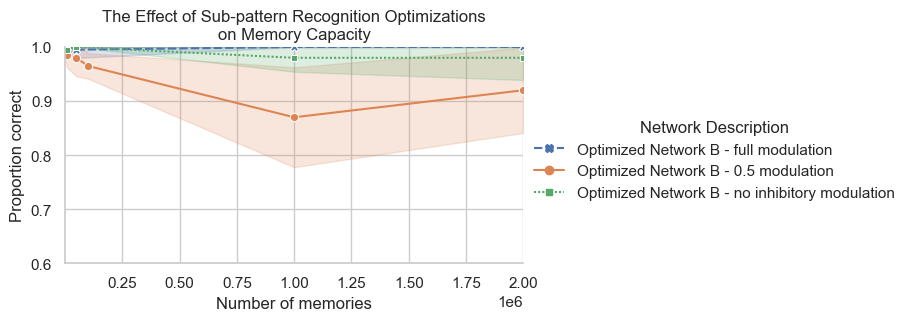

In [4]:
line_key_name = 'Network Description'
plot_data[line_key_name] = plot_data['test'].astype('category')


x_col = 'data_param_m'
y_col = 'prop_correct'

sns.relplot(data=plot_data,
            x=x_col,
            y=y_col,
            style=line_key_name,
            kind='line',
            markers=True,
            height=3,
            aspect=2.0,
            hue=line_key_name,
            hue_order=hue_order,
            errorbar='sd',
            )

plt.xlim(plot_data[x_col].min(), plot_data[x_col].max())
plt.ylim(0.6, 1)
plt.xlabel('Number of memories')
plt.ylabel('Proportion correct')
plt.title('The Effect of Sub-pattern Recognition Optimizations\non Memory Capacity')

# Uncomment the following two lines to save the figure in a timestamped file in the figures dir.
# (The timestamp is added to avoid accidental overwrite)
#tstamp = get_timestamp_str()
#plt.savefig('..'+os.sep+'figures'+os.sep+'figure15_accuracy'+tstamp+'.png', dpi=1000, bbox_inches='tight')

plt.show()

## Figure 14:  Total number of connections

Plot the topology statistic graph illustrating the increase in the connections with memories according to the amount of modulation.

### Generate the topology data for the plots

In [5]:
test_dir = data_base_dir+os.sep+'experiment_B_all_opts'
x_column = 'data_param_m'

plot_data = pd.DataFrame()
for test_file, test_name in tests.items():
    print(test_file, test_name)
    test_data = get_topology_data_for_test(test_dir=test_dir,
                                    test_file=test_file,
                                    data_sheet=data_sheet,
                                    variable_column=x_column)
    test_data['Network'] = test_name
    plot_data = pd.concat([plot_data, test_data])

plot_data[x_col]=plot_data[x_column]

plot_data

fully_optimised_full_mod Optimized Network B - full modulation
Generating topology data for test: experiment_results/experiment_B_all_opts/fully_optimised_full_mod and datasheet: paper_data
fully_optimised_partial_mod Optimized Network B - 0.5 modulation
Generating topology data for test: experiment_results/experiment_B_all_opts/fully_optimised_partial_mod and datasheet: paper_data
fully_optimised_no_inhib Optimized Network B - no inhibitory modulation
Generating topology data for test: experiment_results/experiment_B_all_opts/fully_optimised_no_inhib and datasheet: paper_data


,net_param_f,net_param_h,data_param_m,net_param_f_h_sparsity,net_param_h_f_sparsity_e,net_param_h_f_sparsity_i,data_param_s_m,conns_f_h,conns_h_f_e,conns_h_f_i,conns_h_f,conns_total,Network
0,2000,2,1000,0.1,1.0,1.0,0.1,40000.0,400000.0,3.600000e+06,4.000000e+06,4.040000e+06,Optimized Network B - full modulation
40,2000,2,10000,0.1,1.0,1.0,0.1,400000.0,4000000.0,3.600000e+07,4.000000e+07,4.040000e+07,Optimized Network B - full modulation
80,2000,2,50000,0.1,1.0,1.0,0.1,2000000.0,20000000.0,1.800000e+08,2.000000e+08,2.020000e+08,Optimized Network B - full modulation
120,2000,2,1000000,0.1,1.0,1.0,0.1,40000000.0,400000000.0,3.600000e+09,4.000000e+09,4.040000e+09,Optimized Network B - full modulation
160,2000,2,2000000,0.1,1.0,1.0,0.1,80000000.0,800000000.0,7.200000e+09,8.000000e+09,8.080000e+09,Optimized Network B - full modulation
0,2000,2,1000,0.1,0.5,0.5,0.1,40000.0,200000.0,1.800000e+06,2.000000e+06,2.040000e+06,Optimized Network B - 0.5 modulation
40,2000,2,10000,0.1,0.5,0.5,0.1,400000.0,2000000.0,1.800000e+07,2.000000e+07,2.040000e+07,Optimized Network B - 0.5 modulation
80,2000,2,50000,0.1,0.5,0.5,0.1,2000000.0,10000000.0,9.000000e+07,1.000000e+08,1.020000e+08,Optimized Network B - 0.5 modulation
120,2000,2,100000,0.1,0.5,0.5,0.1,4000000.0,20000000.0,1.800000e+08,2.000000e+08,2.040000e+08,Optimized Network B - 0.5 modulation
180,2000,2,1000000,0.1,0.5,0.5,0.1,40000000.0,200000000.0,1.800000e+09,2.000000e+09,2.040000e+09,Optimized Network B - 0.5 modulation


### Draw the plot

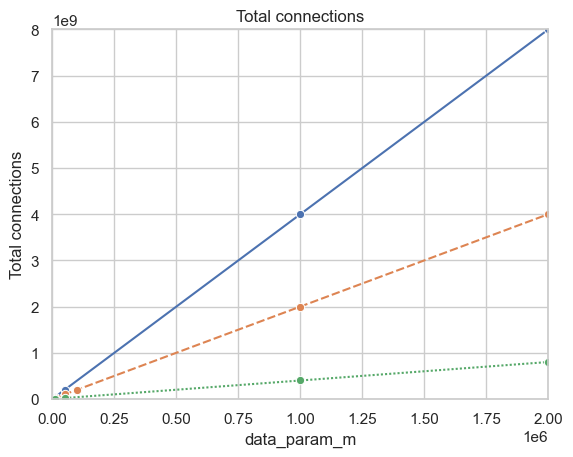

In [6]:
y_col = 'Total connections'
plot_data = plot_data.rename(columns={'conns_h_f': y_col})


# Plot Topologies
ax = sns.lineplot(data=plot_data,
             x=x_col,
             y=y_col,
             style='Network',
             marker='o',
             hue='Network',
             legend=False
             )

ax.set_xlim(0, plot_data[x_col].max())
ax.set_ylim(0, plot_data[y_col].max())
ax.set_title('Total connections')

# Uncomment the following two lines to save the figure in a timestamped file in the figures dir.
# (The timestamp is added to avoid accidental overwrite)
#tstamp = get_timestamp_str()
#plt.savefig('..'+os.sep+'figures'+os.sep+'figure15_connections'+tstamp+'.png', dpi=1000, bbox_inches='tight')

plt.show()